In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [9]:
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'3637' # this is the password established during installation
port = r'5432' # default port estabalished during install
schema = r'cleaned' # schema we just created

In [13]:
engine = create_engine(f'postgresql://{user}:{pw}@{host}:{port}/{db}')

In [15]:
# Extract data from the database
carprices_data = pd.read_sql_table('carprices_data', engine, schema=schema)
carprices_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,0,0,LX,0,0,5xyktca69fg566472,0,5.0,16639.0,0,0,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,0,0,LX,0,0,5xyktca69fg561319,0,5.0,9393.0,0,1,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,1,1,328i SULEV,1,0,wba3c1c51ek116351,0,45.0,1331.0,1,0,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,2,2,T5,1,0,yv1612tb4f1310987,0,41.0,14282.0,0,0,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,1,3,650i,1,0,wba6b2c57ed129731,0,43.0,2641.0,1,0,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [17]:
carprices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482346 entries, 0 to 482345
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          482346 non-null  int64  
 1   make          482346 non-null  int64  
 2   model         482346 non-null  int64  
 3   trim          482346 non-null  object 
 4   body          482346 non-null  int64  
 5   transmission  482346 non-null  int64  
 6   vin           482346 non-null  object 
 7   state         482346 non-null  int64  
 8   condition     482346 non-null  float64
 9   odometer      482346 non-null  float64
 10  color         482346 non-null  int64  
 11  interior      482346 non-null  int64  
 12  seller        482346 non-null  object 
 13  mmr           482346 non-null  float64
 14  sellingprice  482346 non-null  float64
 15  saledate      482346 non-null  object 
dtypes: float64(4), int64(8), object(4)
memory usage: 58.9+ MB


In [19]:
# Checking Null value percentage
carprices_data.isnull().sum()/len(carprices_data)*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

#### Transformation 1: Dropping the records with null values in more than 50% of the columns

In [21]:
# Dropping the rows with null values in more than 50% of the columns
carprices_data = carprices_data.dropna(thresh=carprices_data.shape[1]*0.5)
carprices_data.isnull().sum()/len(carprices_data)*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

#### Transformation 2: Dropping the records where they don't have a make , model , body and style which is the most important columns for predicing the price

In [23]:
# Drop the records where they don't have a make , model , body and style
carprices_data = carprices_data.dropna(subset=['make', 'model', 'body', 'transmission'])
carprices_data.isnull().sum()/len(carprices_data)*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

#### Transformation 3: Imputing the missing values in the columns with mode value and median value based on the data type

In [25]:
# Imputing the missing values in the columns with mode value and median value based on the data type
carprices_data['condition'] = carprices_data['condition'].fillna(carprices_data['condition'].mean())
carprices_data['odometer'] = carprices_data['odometer'].fillna(carprices_data['odometer'].mean())
carprices_data['color'] = carprices_data['color'].fillna(carprices_data['color'].mode()[0])
carprices_data['interior'] = carprices_data['interior'].fillna(carprices_data['interior'].mode()[0])

for parameter in ['mmr', 'sellingprice']:
    carprices_data[parameter] = carprices_data[parameter].fillna(carprices_data[parameter].median())


In [27]:
carprices_data.isnull().sum()/len(carprices_data)*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [29]:
# Rest dropping the rows with null values
carprices_data = carprices_data.dropna()

In [31]:
from sqlalchemy import text

# Create new schema 'cleaned' in the database if it doesn't exist
with engine.connect() as connection:
    connection.execute(text('CREATE SCHEMA IF NOT EXISTS cleaned;'))

#### Transformation 4: Checking the outliers in the data for column "sellingprice" and applying log transformation

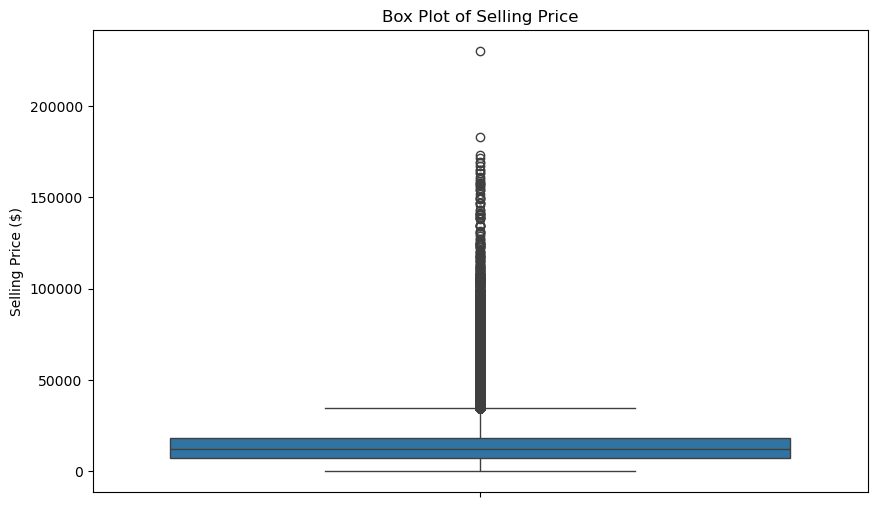


Statistical Summary of Selling Price:
count    482346.000000
mean      13563.065364
std        9636.034280
min           1.000000
25%        7000.000000
50%       12100.000000
75%       18000.000000
max      230000.000000
Name: sellingprice, dtype: float64


In [33]:
# Create a box plot for selling price to check outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=carprices_data['sellingprice'])
plt.title('Box Plot of Selling Price')
plt.ylabel('Selling Price ($)')
plt.show()

# Get statistical summary of selling price
print("\nStatistical Summary of Selling Price:")
print(carprices_data['sellingprice'].describe())

Price Distribution Analysis:
- The car price data shows significant outliers in the higher price range
- However, these outliers cannot be removed because:
  1. They represent legitimate luxury and high-end vehicle sales
  2. Removing them would bias our dataset towards only lower-priced vehicles
  3. They are valid data points that reflect the real market diversity

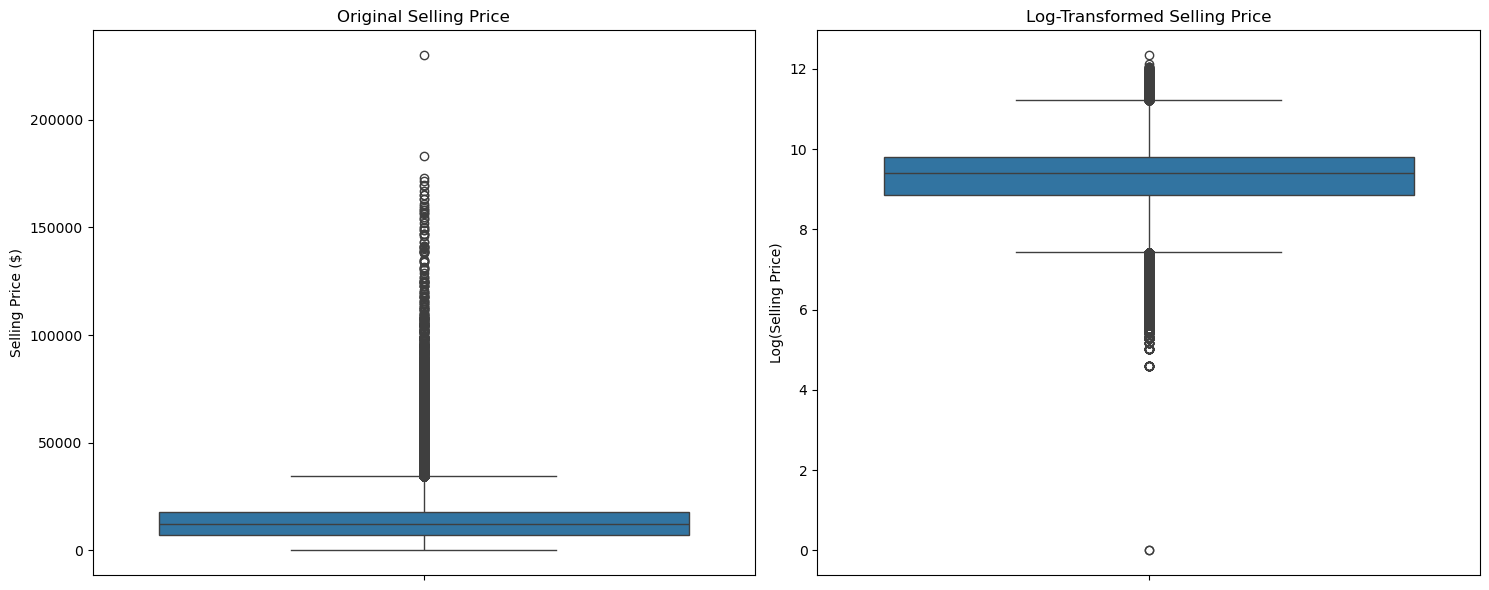


Original Selling Price Summary:
count    482346.000000
mean      13563.065364
std        9636.034280
min           1.000000
25%        7000.000000
50%       12100.000000
75%       18000.000000
max      230000.000000
Name: sellingprice, dtype: float64

Log-Transformed Selling Price Summary:
count    482346.000000
mean          9.212852
std           0.902101
min           0.000000
25%           8.853665
50%           9.400961
75%           9.798127
max          12.345835
Name: sellingprice, dtype: float64


In [35]:
# Create side-by-side box plots of original and log-transformed selling price
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original box plot
sns.boxplot(y=carprices_data['sellingprice'], ax=ax1)
ax1.set_title('Original Selling Price')
ax1.set_ylabel('Selling Price ($)')

# Log-transformed box plot
log_price = np.log(carprices_data['sellingprice'])
sns.boxplot(y=log_price, ax=ax2)
ax2.set_title('Log-Transformed Selling Price')
ax2.set_ylabel('Log(Selling Price)')

plt.tight_layout()
plt.show()

# Print statistical summaries
print("\nOriginal Selling Price Summary:")
print(carprices_data['sellingprice'].describe())
print("\nLog-Transformed Selling Price Summary:")
print(log_price.describe())

Solution:
- Instead of removing outliers, we apply log transformation because:
  1. It helps normalize the price distribution
  2. Reduces the effect of extreme values while preserving them
  3. Makes the data more suitable for statistical analysis
  4. Common practice in price/financial data analysis

In [37]:
carprices_data['log_sellingprice'] = np.log(carprices_data['sellingprice'])

#### Transformation 5: Categorical mapping and dimensional table creation for below columns

In [39]:
# Categorical mapping and dimensional table creation for below columns
"""
1. make
2. model
3. body
4. transmission
5. color [color_id, color] colors table
6. interior [color_id, color] colors table
7. state
"""

# create a dictionary for the above columns and create the tables in the database # note for color and interior we need to create a separate single table (colours)
categorical_columns = ['make', 'model', 'body', 'transmission', 'color', 'interior', 'state']

for column in categorical_columns:
    if column == 'color' or column == 'interior':
        table_name = 'colors'
        colours = pd.DataFrame(carprices_data[column].unique(), columns=[column])
        colours = colours.reset_index(drop=True).reset_index()
        colours = colours.rename(columns={'index': f'{column}_id'})
        colours.to_sql(table_name, engine, schema='cleaned', if_exists='replace', index=False)

        # map the color_id to the ids in the data frame
        carprices_data[column] = carprices_data[column].map(colours.set_index(column)[f'{column}_id'])


    else:
        table_name = column
        column_data = pd.DataFrame(carprices_data[column].unique(), columns=[column])
        column_data = column_data.reset_index(drop=True).reset_index()
        column_data = column_data.rename(columns={'index': f'{column}_id'})
        column_data.to_sql(table_name, engine, schema='cleaned', if_exists='replace', index=False)

        # map the column to the ids in the data frame
        carprices_data[column] = carprices_data[column].map(column_data.set_index(column)[f'{column}_id'])


In [41]:
carprices_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,log_sellingprice
0,2015,0,0,LX,0,0,5xyktca69fg566472,0,5.0,16639.0,0,0,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),9.975808
1,2015,0,0,LX,0,0,5xyktca69fg561319,0,5.0,9393.0,0,1,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),9.975808
2,2014,1,1,328i SULEV,1,0,wba3c1c51ek116351,0,45.0,1331.0,1,0,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),10.308953
3,2015,2,2,T5,1,0,yv1612tb4f1310987,0,41.0,14282.0,0,0,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10.230991
4,2014,1,3,650i,1,0,wba6b2c57ed129731,0,43.0,2641.0,1,0,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11.112448


In [43]:
# push fact table to the database
carprices_data.to_sql('carprices_data', engine, schema='cleaned', if_exists='replace', index=False, chunksize=1000, method='multi')

482346